<a href="https://colab.research.google.com/github/ZamanRepo/ADiffP/blob/master/AI_CS_NBA_NN_TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment analysis using Naive Bayes Classifier and Neural Network

Dr. ANK Zaman

Test data used to train and compare two machine learning models are tweets related to Russian Ukrain war for which the sentiment is labeled using the Affin model.

Tweets are collected using Snscrape API

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cProfile
import time

In [4]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from wordcloud import WordCloud
import string
import nltk
import os
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from google.colab import drive
#tweets_df= pd.read_csv('/content/drive/MyDrive/Russa-Ukrain/russian_ukrain_war - russian_ukrain_war.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets_df= pd.read_csv('/content/drive/MyDrive/Russa-Ukrain/russian_ukrain_war - russian_ukrain_war.csv')

In [ ]:
%timeit tweets_df= pd.read_csv('/content/drive/MyDrive/Russa-Ukrain/russian_ukrain_war - russian_ukrain_war.csv')

33.4 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
cProfile.run("tweets_df= pd.read_csv('/content/drive/MyDrive/Russa-Ukrain/russian_ukrain_war - russian_ukrain_war.csv')")

         2801 function calls (2766 primitive calls) in 0.030 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argsort)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_2d)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(concatenate)
        6    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(vstack)
        6    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1053(_handle_fromlist)
        1    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.000    0.000    0.030    0.030 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__init__)
        5    0.000    0.000    0.000    0.000 _asarray.py:109(<setcomp>)


# Affin model Sentiment Insight

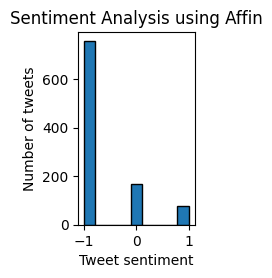

In [ ]:
plt.figure(figsize=(1.5,2.5), dpi=100)
plt.hist(tweets_df['Label'], edgecolor='black', bins=int(9/1))
plt.title('Sentiment Analysis using Affin')
plt.ylabel('Number of tweets')
plt.xlabel('Tweet sentiment')
plt.show()

# Maximum length of tweets

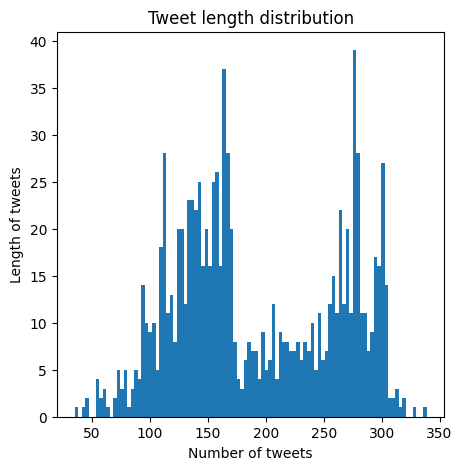

In [ ]:
tweets_df['length']=tweets_df['Text'].apply(len)
plt.figure(figsize=(5,5), dpi=100)
plt.hist(tweets_df['length'], bins=100)
plt.title('Tweet length distribution')
plt.ylabel('Length of tweets')
plt.xlabel('Number of tweets')
plt.show()

# Word cloud for Positive tweets



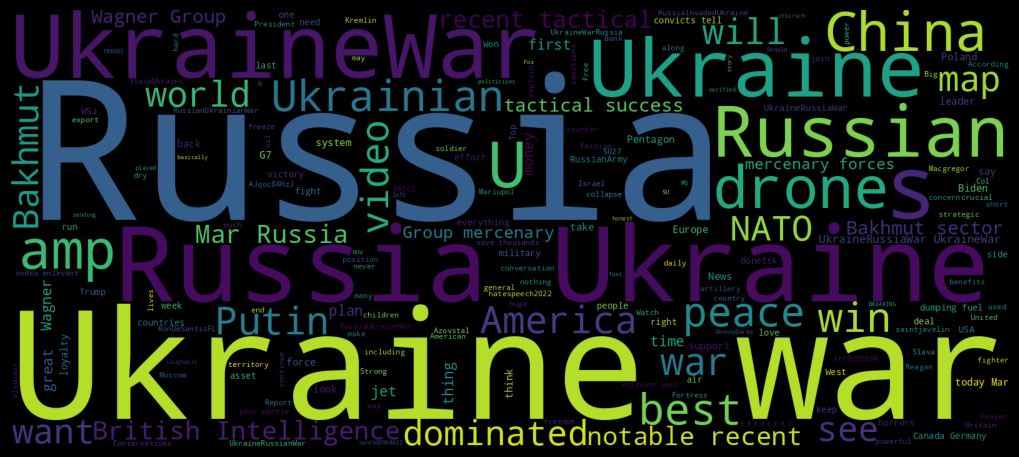

In [ ]:
positive=tweets_df[tweets_df['Label']==1]
negative=tweets_df[tweets_df['Label']==-1]
neutral=tweets_df[tweets_df['Label']==0]

positive_list=positive['Text'].tolist()
negative_list=negative['Text'].tolist()
neutral_list=neutral['Text'].tolist()
positive_sentence_as_one_string="".join(positive_list)
plt.figure(figsize=(10,5), facecolor='k', dpi=100)
w = WordCloud()
word_cloud_stop_words = list(w.stopwords)
#custom_stop_words = ['https','t','co','Russia','Ukraine','war','Russian','UkraineWar','U','S']
custom_stop_words = ['https','t','co']
word_cloud_stop_words_final = set(word_cloud_stop_words + custom_stop_words)
plt.imshow(WordCloud(width=1600, height=700,stopwords=word_cloud_stop_words_final).generate(positive_sentence_as_one_string))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
%timeit plt.show()

The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
3.88 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Word cloud for Negative tweets


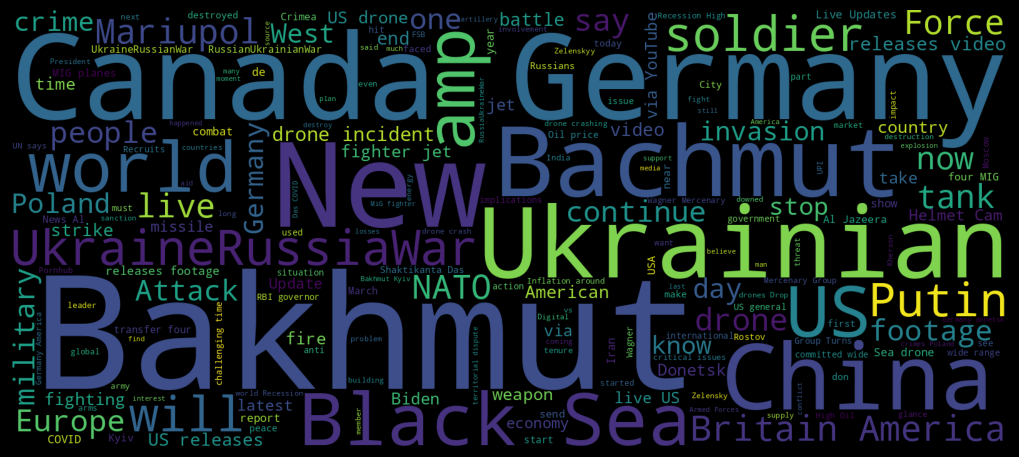

In [ ]:
negative_sentence_as_one_string="".join(negative_list)
plt.figure(figsize=(10,5),facecolor='k', dpi=100)
w = WordCloud()
word_cloud_stop_words = list(w.stopwords)
custom_stop_words = ['https','t','co','Russia','Ukraine','war','Russian','UkraineWar','U','S']
word_cloud_stop_words_final = set(word_cloud_stop_words + custom_stop_words)
plt.imshow(WordCloud(width=1600, height=700,stopwords=word_cloud_stop_words_final).generate(negative_sentence_as_one_string))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
cProfile.run("plt.imshow(WordCloud(width=600, height=200,stopwords=word_cloud_stop_words_final).generate(negative_sentence_as_one_string))")

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




NameError: ignored

# Word cloud for Neutral tweets


In [ ]:
neutral_sentence_as_one_string="".join(neutral_list)
plt.figure(figsize=(10,5),facecolor='k', dpi=300)
w = WordCloud()
word_cloud_stop_words = list(w.stopwords)
custom_stop_words = ['https','t','co','Russia','Ukraine','war','Russian','UkraineWar','U','S']
word_cloud_stop_words_final = set(word_cloud_stop_words + custom_stop_words)
plt.imshow(WordCloud(width=1600, height=700,stopwords=word_cloud_stop_words_final).generate(neutral_sentence_as_one_string))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

NameError: ignored

# Model training with

# Naive Bayes classifier

<Figure size 4000x2400 with 0 Axes>

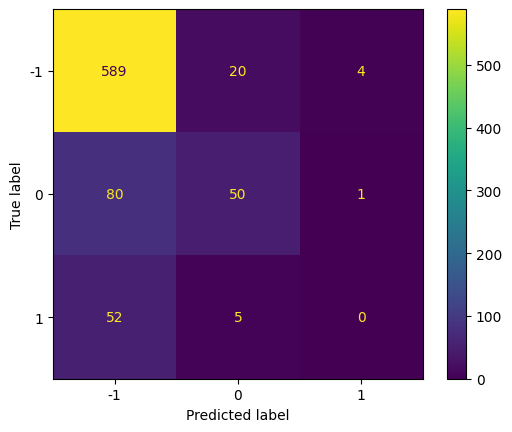

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def message_cleaning(message):
    test_punc_removed=[char for char in message if char not in string.punctuation]
    test_punc_removed_join=''.join(test_punc_removed)
    test_punc_removed_join_clean=[word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

tweets_df_clean=tweets_df['Text'].apply(message_cleaning)
plt.figure(figsize=(5,3), dpi=800)
vectorizer=CountVectorizer(analyzer=message_cleaning)
tweets_countvertorizer=CountVectorizer(analyzer=message_cleaning,dtype='uint8').fit_transform(tweets_df['Text']).toarray()


X=tweets_countvertorizer
y=tweets_df['Label']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.8)

NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)
y_predict_test=NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test, labels=NB_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [ ]:
cProfile.run("NB_classifier.fit(X_train,y_train)")

         1702 function calls (1697 primitive calls) in 0.025 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(amin)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_1d)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(can_cast)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(cumsum)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(empty_like)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(hstack)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(in1d)
        2    0.000 

,-1,0,1,accuracy,macro avg,weighted avg
precision,0.823776,0.666667,0.500000,0.806492,0.663481,0.774809
recall,0.957724,0.444444,0.016667,0.806492,0.472945,0.806492
f1-score,0.885714,0.533333,0.032258,0.806492,0.483769,0.766354
support,615.000000,126.000000,60.000000,0.806492,801.000000,801.000000


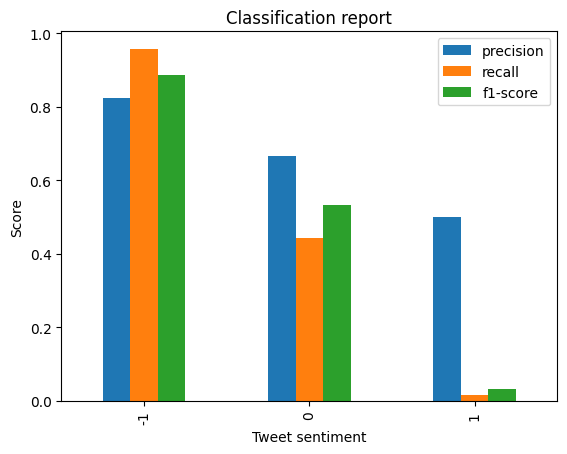

<Figure size 6000x3600 with 0 Axes>

In [ ]:
from IPython import display

classification_report(y_test, y_predict_test)
# print(classification_report(y_test, y_predict_test))
target = ['-1', '0', '1']
report1=classification_report(y_test, y_predict_test,target_names=target,output_dict=True)
display.display(pd.DataFrame(report1))
df = pd.DataFrame(report1)
df.iloc[:3, :3].T.plot(kind='bar')
plt.title('Classification report')
plt.ylabel('Score')
plt.xlabel('Tweet sentiment')
plt.figure(figsize=(5,3), dpi=1200)
plt.show()

In [ ]:
!pip install -q keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 8.1 MB/s eta 0:00:00


In [ ]:
import keras_core as keras

Using TensorFlow backend


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation


In [ ]:
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
#from keras.layers.core import  Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_RE.sub('',text)

def preprocess_text(sen):
    sentence = sen.lower()
    sentence = remove_tags(sentence)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

X = []
sentences = list(tweets_df['Text'])
for sen in sentences:
    X.append(preprocess_text(sen))

y = tweets_df['Text']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

import io
import json
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Russa-Ukrain/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(4970, 100)

# Model Training with:

# Simple Neural Network

In [ ]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          497000    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 507001 (1.93 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 497000 (1.90 MB)
_________________________________________________________________
None


In [ ]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
5/5 [==============================] - 1s 64ms/step - loss: 0.4912 - acc: 0.8234 - val_loss: 0.2282 - val_acc: 0.9875
Epoch 2/6
5/5 [==============================] - 0s 19ms/step - loss: 0.1598 - acc: 0.9984 - val_loss: 0.0885 - val_acc: 1.0000
Epoch 3/6
5/5 [==============================] - 0s 21ms/step - loss: 0.0708 - acc: 1.0000 - val_loss: 0.0479 - val_acc: 1.0000
Epoch 4/6
5/5 [==============================] - 0s 20ms/step - loss: 0.0409 - acc: 1.0000 - val_loss: 0.0322 - val_acc: 1.0000
Epoch 5/6
5/5 [==============================] - 0s 19ms/step - loss: 0.0281 - acc: 1.0000 - val_loss: 0.0247 - val_acc: 1.0000
Epoch 6/6
5/5 [==============================] - 0s 20ms/step - loss: 0.0216 - acc: 1.0000 - val_loss: 0.0205 - val_acc: 1.0000


In [ ]:
cProfile.run("snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)")

Epoch 1/6
5/5 [==============================] - 0s 50ms/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 2/6
5/5 [==============================] - 0s 23ms/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 1.0000
Epoch 3/6
5/5 [==============================] - 0s 32ms/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.0149 - val_acc: 1.0000
Epoch 4/6
5/5 [==============================] - 0s 27ms/step - loss: 0.0126 - acc: 1.0000 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 5/6
5/5 [==============================] - 0s 21ms/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 6/6
5/5 [==============================] - 0s 24ms/step - loss: 0.0109 - acc: 1.0000 - val_loss: 0.0126 - val_acc: 1.0000
         153272 function calls (147530 primitive calls) in 0.990 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        9    0.000    0.000    0.001    0.000 <__array_f

In [ ]:
%timeit snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
5/5 [==============================] - 0s 79ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 2/6
5/5 [==============================] - 0s 32ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 3/6
5/5 [==============================] - 0s 31ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 4/6
5/5 [==============================] - 0s 38ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 5/6
5/5 [==============================] - 0s 41ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 6/6
5/5 [==============================] - 0s 38ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 1/6
5/5 [==============================] - 0s 69ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 2/6
5/5 [==============================] - 0s 34ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0

In [ ]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=7, verbose=1, validation_split=0.2)


Epoch 1/7
5/5 [==============================] - 0s 29ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 2/7
5/5 [==============================] - 0s 15ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 3/7
5/5 [==============================] - 0s 17ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 4/7
5/5 [==============================] - 0s 15ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 5/7
5/5 [==============================] - 0s 13ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 6/7
5/5 [==============================] - 0s 13ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 7/7
5/5 [==============================] - 0s 11ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000


In [ ]:
score = snn_model.evaluate(X_test, y_test, verbose=1)


7/7 [==============================] - 0s 5ms/step - loss: 0.0241 - acc: 1.0000


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.024053657427430153
Test Accuracy: 1.0


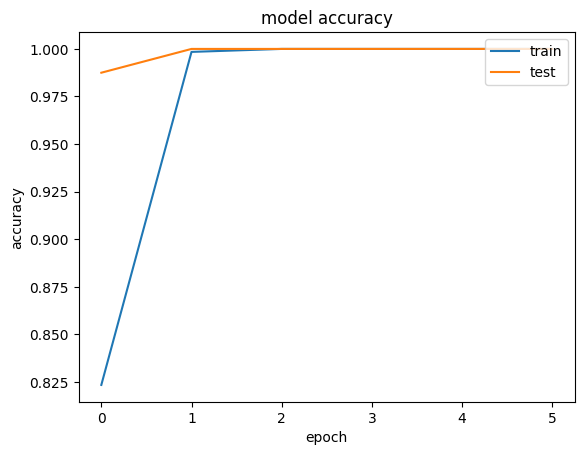

In [ ]:
plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

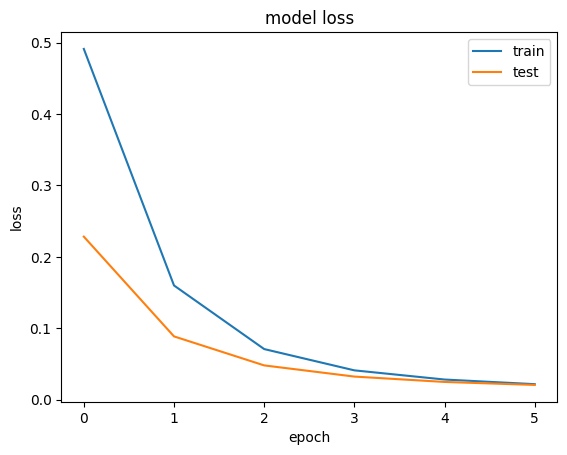

<Figure size 1500x900 with 0 Axes>

In [ ]:

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.figure(figsize=(5,3), dpi=300)
plt.show()

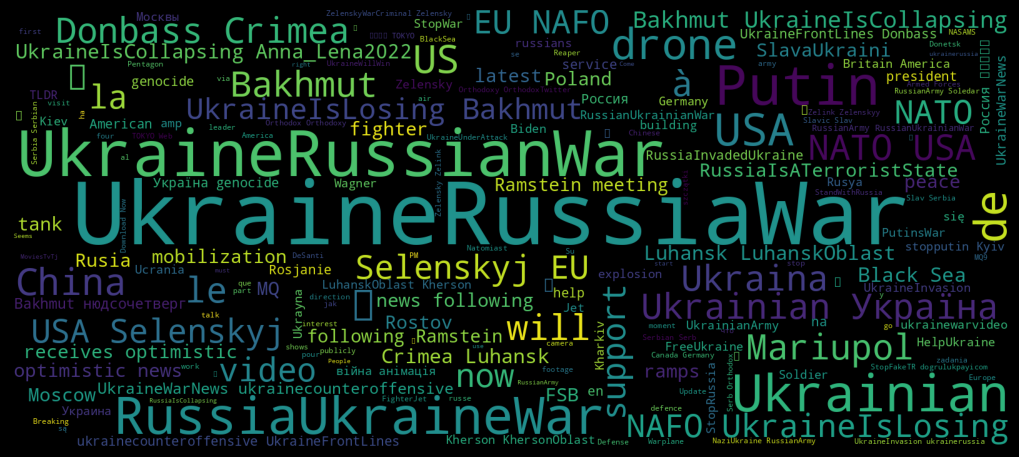

         206533 function calls (205166 primitive calls) in 2.828 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
       57    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(amax)
       57    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(amin)
       25    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(any)
        6    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(broadcast_arrays)
      202    0.001    0.000    0.015    0.000 <__array_function__ internals>:177(clip)
       13    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(column_stack)
       31    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
      410    0

In [ ]:
import cProfile
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_word_cloud():
    neutral_sentence_as_one_string = "".join(neutral_list)

    # Define custom stop words
    custom_stop_words = ['https', 't', 'co', 'Russia', 'Ukraine', 'war', 'Russian', 'UkraineWar', 'U', 'S']

    # Get the default WordCloud stopwords
    w = WordCloud()
    word_cloud_stop_words = list(w.stopwords)

    # Combine default stopwords and custom stopwords
    word_cloud_stop_words_final = set(word_cloud_stop_words + custom_stop_words)

    # Generate the WordCloud
    plt.figure(figsize=(10, 5), facecolor='k', dpi=100)
    plt.imshow(WordCloud(width=1600, height=700, stopwords=word_cloud_stop_words_final).generate(neutral_sentence_as_one_string))
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

if __name__ == "__main__":
    cProfile.run("generate_word_cloud()")
